# Классификация в реальной жизни
## Набор данных lris


600
[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5. ]
[7.  6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8
 6.2 5.6 5.9 6.1 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.
 6.7 6.3 5.6 5.5 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7]
[6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7
 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7
 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8 6.7 6.7 6.3 6.5 6.2 5.9]


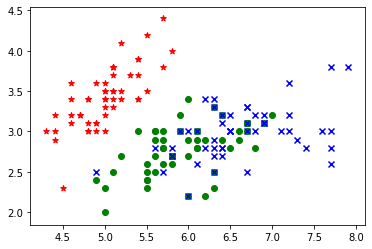

In [30]:
from matplotlib import pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
data = load_iris()

features = data.data
features_names = data.feature_names
target = data.target
target_names = data.target_names
print(features.size)
for t in range(3):
    if t == 0:
        c = 'r'
        marker = '*'
    elif t == 1:
        c = 'g'
        marker = 'o'
    elif t == 2:
        c = 'b'
        marker = 'x'
    #print(target == t)
    #print(type(target))
    #print(features[target == t,0])
    print(features[target == t,0])

    plt.scatter(features[target == t,0],features[target == t,1], marker= marker,c = c)



# построение первой модели классификации

In [31]:
#Используем прихотливое индексирование NumPy, чтобы получить массив строк

labels = target_names[target]



#Длина лепестка - признак в позиции 2
plength = features[:, 2]

#Строим массив булевых значений
is_setosa = (labels == 'setosa')

#Это важный шаг

max_setosa = plength[is_setosa].max()
min_non_setosa = plength[~is_setosa].min()

print('Maximum of setosa: {0}.'.format(max_setosa))
print( 'Minimum of others: {0}.'.format(min_non_setosa))

print(features.size)



Maximum of setosa: 1.9.
Minimum of others: 3.0.
600


In [32]:

featuresa = features[~is_setosa]
labelsa = labels[~is_setosa]
is_virginica = (labelsa == 'virginica')
print(is_virginica)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


In [42]:
best_acc = -1.0

print(featuresa.shape)
for fi in range(featuresa.shape[1]):
    thresh = featuresa[:,fi]
    print(featuresa[:,fi])
    for t in thresh:
        feature_i = featuresa[:, fi]
        pred = (feature_i>t)
        acc = (pred == is_virginica).mean()
        rev_acc = (pred == ~is_virginica).mean()
        
        if rev_acc > acc:
            reverse = True
            acc = rev_acc
        else:
            reverse = False
        if acc > best_acc:
            best_acc = acc
            best_fi = fi
            best_t = t
            best_reverse = reverse
            
        




(100, 4)
[7.  6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8
 6.2 5.6 5.9 6.1 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.
 6.7 6.3 5.6 5.5 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3
 6.5 7.6 4.9 7.3 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6
 7.7 6.3 6.7 7.2 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9
 6.7 6.9 5.8 6.8 6.7 6.7 6.3 6.5 6.2 5.9]
[3.2 3.2 3.1 2.3 2.8 2.8 3.3 2.4 2.9 2.7 2.  3.  2.2 2.9 2.9 3.1 3.  2.7
 2.2 2.5 3.2 2.8 2.5 2.8 2.9 3.  2.8 3.  2.9 2.6 2.4 2.4 2.7 2.7 3.  3.4
 3.1 2.3 3.  2.5 2.6 3.  2.6 2.3 2.7 3.  2.9 2.9 2.5 2.8 3.3 2.7 3.  2.9
 3.  3.  2.5 2.9 2.5 3.6 3.2 2.7 3.  2.5 2.8 3.2 3.  3.8 2.6 2.2 3.2 2.8
 2.8 2.7 3.3 3.2 2.8 3.  2.8 3.  2.8 3.8 2.8 2.8 2.6 3.  3.4 3.1 3.  3.1
 3.1 3.1 2.7 3.2 3.3 3.  2.5 3.  3.4 3. ]
[4.7 4.5 4.9 4.  4.6 4.5 4.7 3.3 4.6 3.9 3.5 4.2 4.  4.7 3.6 4.4 4.5 4.1
 4.5 3.9 4.8 4.  4.9 4.7 4.3 4.4 4.8 5.  4.5 3.5 3.8 3.7 3.9 5.1 4.5 4.5
 4.7 4.4 4.1 4.  4.4 4.6 4.  3.3

In [43]:
def is_virginica_test(fi, t, reverse, example):
    test = example[fi] > t
    if reverse:
        test = not test
    return test
